## Проектная работа по модулю “Построение моделей”

В данной работе предлагается решить задачу бинарной классификации на большом признаковом множестве для датасета банка Santader (https://www.santanderbank.com/us/personal)

### 1. Загрузить данные 

In [1]:
import pandas as pd
import numpy as np


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 5464-2836

 Directory of C:\Users\Arsen\Downloads\data_science

18-Jan-19  02:44    <DIR>          .
18-Jan-19  02:44    <DIR>          ..
14-Jan-19  19:15    <DIR>          .ipynb_checkpoints
14-Jan-19  19:35    <DIR>          lectures-master
14-Jan-19  19:31        94,410,854 lectures-master.zip
18-Jan-19  02:44            36,761 project modelling.ipynb
17-Dec-18  20:53            46,637 project_models.pptx
02-Jan-19  23:18        59,054,007 test.csv
02-Jan-19  23:17        59,362,806 train.csv
14-Jan-19  19:41             1,687 Untitled.ipynb
               6 File(s)    212,912,752 bytes
               4 Dir(s)  436,368,953,344 bytes free


In [5]:
data_train=pd.read_csv('train.csv')#, sep=';')
data_test=pd.read_csv('test.csv')

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [7]:
%time#data_test.info(max_cols=370)
data_test.info()

UsageError: Line magic function `%time#data_test.info(max_cols=370)` not found.


In [8]:
data_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


Class 0: 73012
Class 1: 3008
Proportion: 24.27 : 1


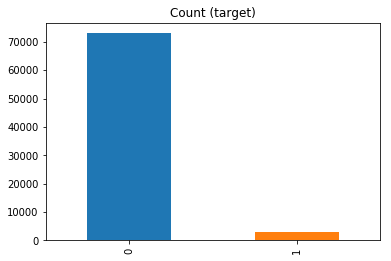

In [9]:
#data_train['TARGET'].value_counts()

target_count = data_train.TARGET.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [10]:
3008/(3008+73012)

0.0395685345961589

### 2. Провести описательный анализ предложенных данных

In [11]:
data_train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [12]:
#все значения не нулл
data_train.info(max_cols=371)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Data columns (total 371 columns):
ID                               76020 non-null int64
var3                             76020 non-null int64
var15                            76020 non-null int64
imp_ent_var16_ult1               76020 non-null float64
imp_op_var39_comer_ult1          76020 non-null float64
imp_op_var39_comer_ult3          76020 non-null float64
imp_op_var40_comer_ult1          76020 non-null float64
imp_op_var40_comer_ult3          76020 non-null float64
imp_op_var40_efect_ult1          76020 non-null float64
imp_op_var40_efect_ult3          76020 non-null float64
imp_op_var40_ult1                76020 non-null float64
imp_op_var41_comer_ult1          76020 non-null float64
imp_op_var41_comer_ult3          76020 non-null float64
imp_op_var41_efect_ult1          76020 non-null float64
imp_op_var41_efect_ult3          76020 non-null float64
imp_op_var41_ult1                76020 non-null float64


In [ ]:
#data_train.isnull().sum().sum()
#data_train.isnull().any().any()

### 3. Провести анализ корреляции переменных, отобразить взаимосвязи между переменными

In [13]:
#data_train['saldo_medio_var13_medio_hace3'].value_counts()
len(data_train['ind_var2'].value_counts())

1

In [14]:
#Есть полностью константные столбцы, удалим их
constants=[]
for i in range(len(data_train.columns)):
    if (len(data_train[data_train.columns[i]].value_counts()))==1:
        constants.append(data_train.columns[i])
       #print(data_train.columns[i])
print(len(constants))

34


In [15]:
data_train.drop(columns=constants, inplace=True)
data_test.drop(columns=constants, inplace=True)

In [16]:
data_train.corr()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,1.000000,-0.001025,-0.002135,-0.003111,-0.001436,-0.004131,-0.007277,-6.302170e-03,-0.006700,-0.006698,...,0.001986,0.003771,-0.001521,-0.001216,-0.003772,-0.003674,-0.000856,0.000297,-0.005687,0.003148
var3,-0.001025,1.000000,-0.004452,0.001868,0.005989,0.006817,0.001518,1.690469e-03,0.000530,0.000611,...,0.000716,0.000491,0.000638,0.000669,0.000617,0.000508,0.000738,0.000778,0.000071,0.004475
var15,-0.002135,-0.004452,1.000000,0.043722,0.094762,0.101177,0.042754,4.851218e-02,0.008805,0.009678,...,0.029358,0.017264,0.028504,0.029176,0.029180,0.018884,0.032833,0.033597,0.006497,0.101322
imp_ent_var16_ult1,-0.003111,0.001868,0.043722,1.000000,0.041221,0.034879,0.009896,9.377310e-03,0.000592,0.002510,...,-0.000864,-0.000632,-0.000548,-0.000540,0.002655,-0.000612,0.005055,0.006590,0.000007,-0.000017
imp_op_var39_comer_ult1,-0.001436,0.005989,0.094762,0.041221,1.000000,0.886476,0.342709,2.952946e-01,0.032280,0.054809,...,0.016422,0.011719,0.012570,0.013703,0.009445,0.005532,0.011665,0.010802,0.012546,0.010353
imp_op_var39_comer_ult3,-0.004131,0.006817,0.101177,0.034879,0.886476,1.000000,0.316671,3.556704e-01,0.029094,0.055449,...,0.027489,0.021819,0.018427,0.020530,0.008539,0.006359,0.010660,0.009822,0.013271,0.003517
imp_op_var40_comer_ult1,-0.007277,0.001518,0.042754,0.009896,0.342709,0.316671,1.000000,8.522060e-01,0.061187,0.106558,...,0.003191,0.006769,0.001773,0.002694,-0.000436,-0.000480,-0.000254,-0.000372,0.016628,0.003119
imp_op_var40_comer_ult3,-0.006302,0.001690,0.048512,0.009377,0.295295,0.355670,0.852206,1.000000e+00,0.053579,0.110342,...,0.005885,0.010836,0.003285,0.004882,-0.000561,-0.000529,-0.000510,-0.000601,0.015584,-0.000358
imp_op_var40_efect_ult1,-0.006700,0.000530,0.008805,0.000592,0.032280,0.029094,0.061187,5.357914e-02,1.000000,0.887375,...,-0.000235,-0.000162,-0.000210,-0.000220,-0.000211,-0.000170,-0.000254,-0.000268,-0.000315,0.019221
imp_op_var40_efect_ult3,-0.006698,0.000611,0.009678,0.002510,0.054809,0.055449,0.106558,1.103420e-01,0.887375,1.000000,...,-0.000270,-0.000186,-0.000242,-0.000253,-0.000243,-0.000195,-0.000292,-0.000308,0.000682,0.019965


In [17]:
corr=data_train.corr()

In [18]:
n=len(data_train.columns)
n

337

In [19]:
related=[]
for i in range(n):
    for j in (0,i-1):
        if abs(corr.iloc[i,j])>0.8 and i>j:
            related.append([i, \
                            data_train.columns[i], \
                            j, \
                            data_train.columns[j],\
                             corr.iloc[i,j]])

In [20]:
#78 пар переменных, с высокой степенью зависимости
print(len(related))
related

79


[[5,
  'imp_op_var39_comer_ult3',
  4,
  'imp_op_var39_comer_ult1',
  0.8864760492043228],
 [7,
  'imp_op_var40_comer_ult3',
  6,
  'imp_op_var40_comer_ult1',
  0.8522059982629335],
 [9,
  'imp_op_var40_efect_ult3',
  8,
  'imp_op_var40_efect_ult1',
  0.8873754013540183],
 [12,
  'imp_op_var41_comer_ult3',
  11,
  'imp_op_var41_comer_ult1',
  0.8858363551745949],
 [14,
  'imp_op_var41_efect_ult3',
  13,
  'imp_op_var41_efect_ult1',
  0.8100844226223946],
 [16, 'imp_op_var39_efect_ult1', 15, 'imp_op_var41_ult1', 0.8838916116247361],
 [17,
  'imp_op_var39_efect_ult3',
  16,
  'imp_op_var39_efect_ult1',
  0.8108470896461588],
 [27, 'ind_var8', 26, 'ind_var8_0', 0.9312334223308523],
 [29, 'ind_var12', 28, 'ind_var12_0', 0.81100573618375],
 [31, 'ind_var13_corto_0', 30, 'ind_var13_0', 0.902084068261123],
 [32, 'ind_var13_corto', 31, 'ind_var13_corto_0', 0.9821003655107075],
 [34, 'ind_var13_largo', 33, 'ind_var13_largo_0', 0.9914699070897898],
 [36, 'ind_var13_medio', 35, 'ind_var13_medio_0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


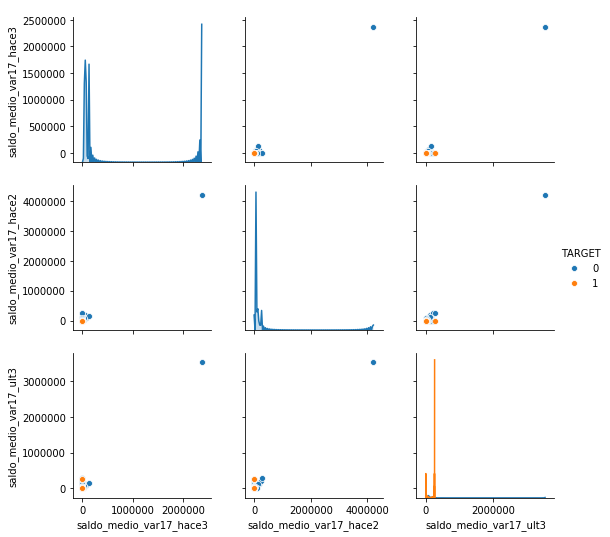

In [21]:
sns.pairplot(data_train, hue='TARGET', 
             vars=['saldo_medio_var17_hace3', 'saldo_medio_var17_hace2', 'saldo_medio_var17_ult3'])
plt.show()

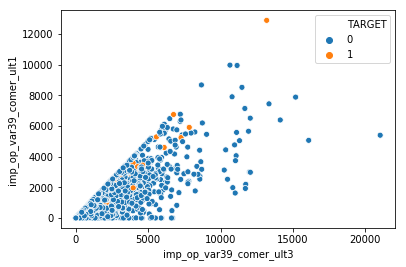

In [22]:
sns.scatterplot(x='imp_op_var39_comer_ult3', y='imp_op_var39_comer_ult1', hue='TARGET', data=data_train, palette=None)


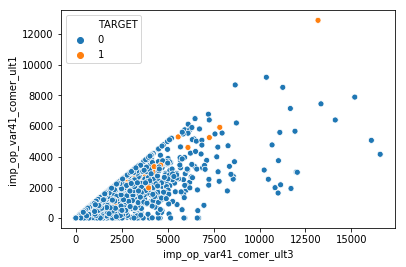

In [23]:
sns.scatterplot(x='imp_op_var41_comer_ult3', y='imp_op_var41_comer_ult1', hue='TARGET', data=data_train, palette=None)

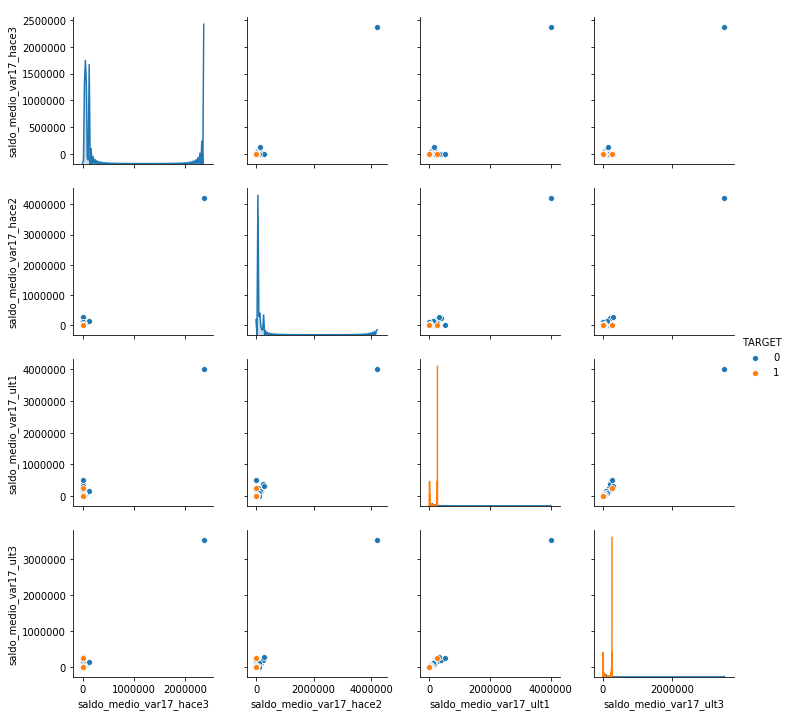

In [24]:
sns.pairplot(data_train, hue='TARGET', 
             vars=['saldo_medio_var17_hace3', 'saldo_medio_var17_hace2', \
                   'saldo_medio_var17_ult1', 'saldo_medio_var17_ult3'])

In [25]:
# У искомой переменной нет сильной коррелляции с отдельно взятыми признаками 
sorted(corr.iloc[n-1,:n-1], key=lambda x: -abs(x))


[-0.14981051952126045,
 -0.14825285370241598,
 -0.1382890341312124,
 -0.1356928668834707,
 -0.13534850220204198,
 -0.13409523664913522,
 0.10291932386985705,
 0.10132209856058841,
 -0.08019367160799071,
 -0.07687242112593187,
 0.04666549435356513,
 0.046622184679291044,
 -0.039611927734865875,
 -0.03947067316623466,
 -0.03839993865749468,
 -0.038214935902271575,
 -0.0380449057764446,
 -0.03709220544537593,
 -0.03504527878509908,
 -0.03443814444497403,
 -0.03443170941937355,
 -0.034367326480928106,
 -0.034336713230372996,
 -0.03425468897395831,
 -0.034235805056124446,
 -0.034149182283815825,
 -0.03410829401573764,
 -0.03390272645786622,
 -0.03288776753986492,
 -0.03214815438464919,
 -0.03213927406907201,
 -0.03195846817529568,
 0.030380260916578666,
 -0.03030199545706231,
 -0.030300062808062463,
 -0.0302762519201263,
 -0.029547501224434124,
 0.029478518122465255,
 -0.029180745021775423,
 -0.028911980034331587,
 0.02792603019643872,
 0.027926030196424853,
 0.0275864620002026,
 0.02741644

In [26]:
corr.iloc[n-1,:n-1].sort_values(ascending=True)

ind_var30                    -0.149811
num_meses_var5_ult3          -0.148253
num_var30                    -0.138289
num_var42                    -0.135693
ind_var5                     -0.135349
num_var5                     -0.134095
num_var4                     -0.080194
num_var35                    -0.076872
ind_var13                    -0.039612
ind_var13_0                  -0.039471
num_var13                    -0.038400
ind_var12_0                  -0.038215
num_var13_0                  -0.038045
saldo_var30                  -0.037092
ind_var39_0                  -0.035045
ind_var13_corto              -0.034438
num_var13_corto              -0.034432
num_meses_var13_corto_ult3   -0.034367
ind_var13_corto_0            -0.034337
ind_var12                    -0.034255
num_var13_corto_0            -0.034236
ind_var41_0                  -0.034149
num_var12                    -0.034108
num_var30_0                  -0.033903
ind_var5_0                   -0.032888
ind_var24                

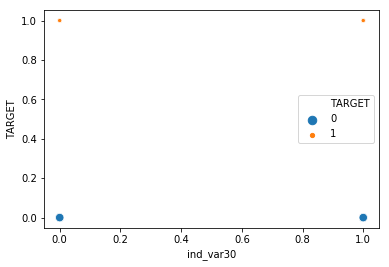

In [27]:
sns.scatterplot(x='ind_var30', y='TARGET', hue='TARGET', size='TARGET', data=data_train, palette=None)

### 4. Провести стратегию Feature Selection (попробовать как минимум два различных подхода)

In [ ]:
#Подход 1 - взять фичи со значительным feature_importances

In [28]:
y_train=data_train['TARGET']

In [29]:
data_train.drop(columns='TARGET', inplace=True)

In [30]:
# ограничиваю глубину и количество фич, чтобы классификатор не сильно переобучился
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_regression

forestcl = RandomForestClassifier(n_estimators=100, max_features=10, max_depth=40)
forestcl.fit(data_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=40, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
forestcl.score(data_train, y_train)

0.9827019205472244

In [32]:
from sklearn.metrics import confusion_matrix
y_pred = forestcl.predict(data_train)
confusion_matrix(y_train, y_pred)

array([[73012,     0],
       [ 1315,  1693]], dtype=int64)

In [33]:
#forestcl.feature_importances_
for i in sorted(zip(forestcl.feature_importances_, data_train.columns), key=lambda x: -abs(x[0])):
    print(i)

(0.1836193526640722, 'ID')
(0.1694704269018541, 'var38')
(0.1402016792707325, 'var15')
(0.025000022214577346, 'saldo_medio_var5_ult3')
(0.022984075099482727, 'num_var45_ult3')
(0.021180680611497155, 'saldo_medio_var5_hace3')
(0.01893108746229201, 'num_var45_hace3')
(0.01807306139111396, 'saldo_medio_var5_hace2')
(0.01745039385608639, 'saldo_var30')
(0.017198433878370153, 'saldo_var42')
(0.016924922263622407, 'num_var45_hace2')
(0.016616907533126394, 'num_var22_ult3')
(0.015422705706752677, 'saldo_medio_var5_ult1')
(0.01528584570021902, 'saldo_var5')
(0.012696548415800138, 'num_med_var45_ult3')
(0.01243118883599769, 'num_var45_ult1')
(0.011755614807065308, 'num_var22_hace3')
(0.011379117724145175, 'num_var22_hace2')
(0.008370709631334829, 'num_var22_ult1')
(0.008243179216013285, 'var36')
(0.007242713457668998, 'num_meses_var5_ult3')
(0.007059022250567501, 'num_meses_var39_vig_ult3')
(0.006857442364543816, 'num_med_var22_ult3')
(0.0057774100125446955, 'num_var35')
(0.005443206711242412, 

In [ ]:
#Три фичи: 'ID', 'var38', 'var15' имеют feature_importances >0.1. 
#Возможно, не самые лучшие. Смущает 'ID'
#Нужно еще раз проделать выбор после шкалирования

In [34]:
forestcl = RandomForestClassifier(n_estimators=100, max_features=3, max_depth=40)
forestcl.fit(data_train[['ID', 'var38', 'var15']], y_train)
y_pred = forestcl.predict(data_train[['ID', 'var38', 'var15']])
confusion_matrix(y_train, y_pred)

array([[73012,     0],
       [   10,  2998]], dtype=int64)

In [35]:
forestcl.score(data_train[['ID', 'var38', 'var15']], y_train)

0.9998684556695606

In [36]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=1\
                        #random_state=0, solver='lbfgs',
                        #\
                        #multi_class='multinomial'
                       )

LR.fit(data_train[['ID', 'var38', 'var15']], y_train)
LR.score(data_train[['ID', 'var38', 'var15']], y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9604314654038411

In [37]:
y_pred = LR.predict(data_train[['ID', 'var38', 'var15']])
confusion_matrix(y_train, y_pred)

array([[73012,     0],
       [ 3008,     0]], dtype=int64)

In [ ]:
#Логистическая регрессия превратилась в константу

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


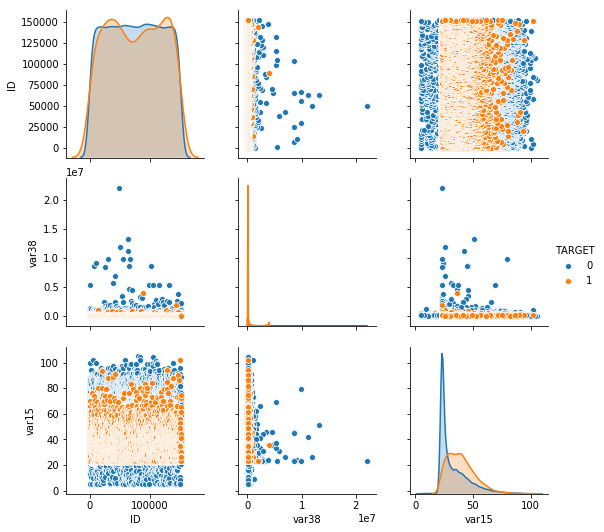

In [38]:
data_train['TARGET']=y_train

sns.pairplot(data_train, \
             hue='TARGET', \
             vars=['ID', 'var38', 'var15'])
data_train.drop(columns='TARGET', inplace=True)

In [ ]:
#подход 2 - регуляризация. Обнуляем незначимые переменные


In [39]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1, fit_intercept=True\
                         #, copy_X=True\
                         , max_iter=1000 \
                         #,normalize=True \
                         #, positive=False, precompute=False, random_state=None \
                         #,selection='cyclic'\
                         , tol=0.0001\
                         #, warm_start=False\
                        )
clf.fit(data_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [40]:
#У тех же двух фичей 'var15', 'var36' коэффициенты на порядки больше, чем остальные для такой альфы в регуляризации
sorted(zip(data_train.columns, clf.coef_), key=lambda x: -abs(x[1]))

[('var15', 0.0014011335197129052),
 ('var36', 0.0004100913585381426),
 ('saldo_var40', 1.4716201121433663e-05),
 ('imp_op_var41_ult1', 7.399696586470904e-06),
 ('imp_op_var41_comer_ult1', 5.556535081681854e-06),
 ('imp_op_var39_comer_ult3', -5.468870433602974e-06),
 ('imp_op_var39_efect_ult1', 3.6183087636837507e-06),
 ('imp_reemb_var17_ult1', 3.1098378888241453e-06),
 ('var21', -2.9690257980786526e-06),
 ('imp_trasp_var17_in_ult1', -2.8061414854170906e-06),
 ('imp_trasp_var17_out_ult1', -2.6294661320901285e-06),
 ('saldo_var32', -1.5008217416425476e-06),
 ('saldo_medio_var17_hace2', -1.4142542600948546e-06),
 ('saldo_medio_var33_ult1', -1.0496059063617977e-06),
 ('saldo_medio_var17_ult3', 1.0164881133335113e-06),
 ('saldo_var37', 9.254911847484273e-07),
 ('saldo_medio_var8_ult3', 8.001846694024464e-07),
 ('imp_aport_var17_hace3', 6.838199203629835e-07),
 ('imp_reemb_var13_ult1', 6.784376185026414e-07),
 ('saldo_medio_var8_hace2', -6.746781972374207e-07),
 ('imp_compra_var44_hace3', -4

In [41]:
#LR.fit(data_train[['saldo_var30', 'var38']], y_train)
#LR.score(data_train[['saldo_var30', 'var38']], y_train) 
#y_pred = LR.predict(data_train[['saldo_var30', 'var38']])
#confusion_matrix(y_train, y_pred)


LR.fit(data_train[['ID','var15', 'var36']], y_train)
LR.score(data_train[['ID', 'var15', 'var36']], y_train)

y_pred = LR.predict(data_train[['ID', 'var15', 'var36']])
confusion_matrix(y_train, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[73012,     0],
       [ 3008,     0]], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


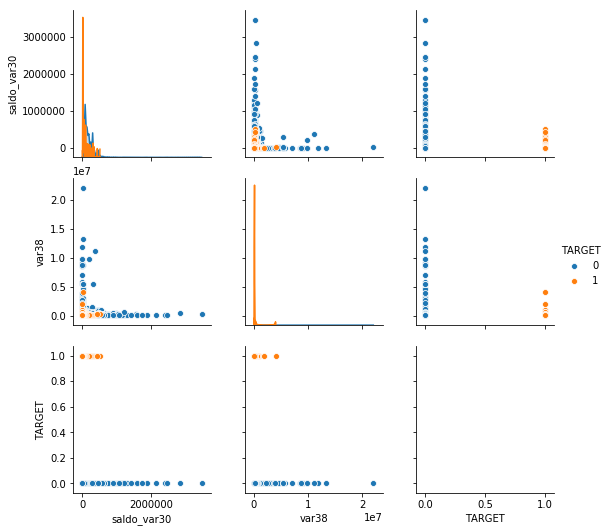

In [42]:
data_train['TARGET']=y_train

sns.pairplot(data_train, \
             hue='TARGET', \
             vars=['saldo_var30', 'var38', 'TARGET'])
data_train.drop(columns='TARGET', inplace=True)

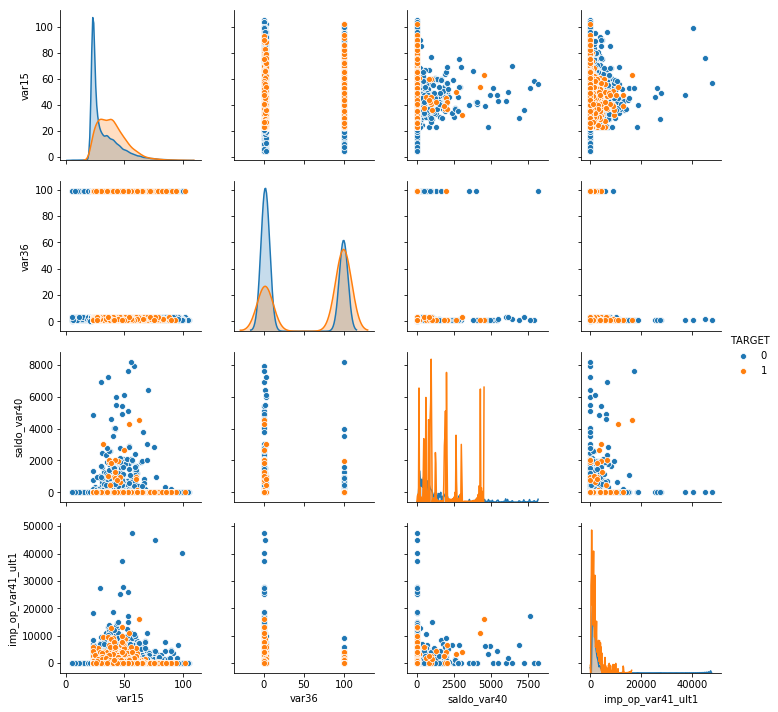

In [43]:
data_train['TARGET']=y_train

sns.pairplot(data_train, \
             hue='TARGET', \
             vars=['var15', 'var36','saldo_var40', 'imp_op_var41_ult1'])
data_train.drop(columns='TARGET', inplace=True)

In [44]:
#итого беру три фичи [['ID','var15', 'var36']]. Между собой они независимы
corr=data_train[['ID','var15', 'var36']].corr()
corr

,ID,var15,var36
ID,1.000000,-0.002135,-0.000726
var15,-0.002135,1.000000,-0.145342
var36,-0.000726,-0.145342,1.000000


### 5. Шкалировать данные несколькими способами (нормализация, стандартизация). Какой подход лучше?

In [45]:
#стандартизация 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data_train=scaler.fit_transform(data_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [46]:
scaled_data_train=pd.DataFrame(data=scaled_data_train, columns=data_train.columns)
scaled_data_train.head()
#data_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,-1.735043,0.039074,-0.788249,-0.053388,-0.213263,-0.218813,-0.038206,-0.042103,-0.013493,-0.015538,...,-0.005854,-0.017408,-0.011979,-0.015597,-0.016314,-0.01565,-0.012576,-0.018817,-0.019847,-0.427183
1,-1.734997,0.039074,0.060753,-0.053388,-0.213263,-0.218813,-0.038206,-0.042103,-0.013493,-0.015538,...,-0.005854,-0.017408,-0.011979,-0.015597,-0.016314,-0.01565,-0.012576,-0.018817,-0.019847,-0.372038
2,-1.734974,0.039074,-0.788249,-0.053388,-0.213263,-0.218813,-0.038206,-0.042103,-0.013493,-0.015538,...,-0.005854,-0.017408,-0.011979,-0.015597,-0.016314,-0.01565,-0.012576,-0.018817,-0.019847,-0.273191
3,-1.734883,0.039074,0.292298,-0.053388,0.361427,0.138158,-0.038206,-0.042103,-0.013493,-0.015538,...,-0.005854,-0.017408,-0.011979,-0.015597,-0.016314,-0.01565,-0.012576,-0.018817,-0.019847,-0.291398
4,-1.734837,0.039074,0.446662,-0.053388,-0.213263,-0.218813,-0.038206,-0.042103,-0.013493,-0.015538,...,-0.005854,-0.017408,-0.011979,-0.015597,-0.016314,-0.01565,-0.012576,-0.018817,-0.019847,0.000412


In [ ]:
#чтобы оценить шкалирование попробую опять запустить лес.

In [47]:
forestcl.fit(scaled_data_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=40, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
for i in sorted(zip(forestcl.feature_importances_, scaled_data_train.columns), key=lambda x: -abs(x[0])):
    print(i)

(0.12756473021094414, 'var38')
(0.12605573459254107, 'ID')
(0.12550913425578525, 'var15')
(0.024851381728435703, 'num_var45_ult3')
(0.024091489042850772, 'saldo_medio_var5_ult3')
(0.021546818265716135, 'saldo_var42')
(0.021409694224300814, 'num_var45_hace3')
(0.021266072447750743, 'saldo_medio_var5_hace2')
(0.020982227055525993, 'saldo_medio_var5_ult1')
(0.020434132030382843, 'saldo_var30')
(0.019327020512123073, 'num_var22_ult3')
(0.01831953038535802, 'saldo_medio_var5_hace3')
(0.018121100805412196, 'num_var45_hace2')
(0.016957026117580768, 'saldo_var5')
(0.015284694215510692, 'num_var45_ult1')
(0.015263380610410106, 'num_med_var45_ult3')
(0.013860578042159668, 'num_var22_hace3')
(0.013192752492425342, 'num_var22_hace2')
(0.010019593630036619, 'num_var22_ult1')
(0.009156193365566225, 'num_med_var22_ult3')
(0.009145576554109483, 'num_meses_var5_ult3')
(0.00890890372208624, 'var36')
(0.007927465227009926, 'num_meses_var39_vig_ult3')
(0.007785638270033151, 'imp_op_var39_ult1')
(0.0074854

In [49]:
forestcl.fit(scaled_data_train[['ID', 'var38', 'var15']], y_train)
print(forestcl.score(scaled_data_train[['ID', 'var38', 'var15']], y_train))
y_pred = forestcl.predict(scaled_data_train[['ID', 'var38', 'var15']])
confusion_matrix(y_train, y_pred)

0.9998816101026046


array([[73012,     0],
       [    9,  2999]], dtype=int64)

In [50]:
forestcl

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=40, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
#То же самое , что было без шкалирования. Насколько я знаю, для случайного леса не требуется шкалирование. 
#А как классификатор - годится

In [ ]:
#попробуем оценить шкалирование с помощью svm. Сначала берем данные без шкалирования

In [51]:
from sklearn import svm
svc_clf = svm.SVC(C=1.0, cache_size=200, class_weight=None, \
              coef0=0.0,\
              decision_function_shape='ovr', \
              degree=3, \
              gamma='scale', \
              kernel='rbf', \
              max_iter=-1, probability=False, random_state=None, shrinking=True, \
              tol=0.001, verbose=False)

In [52]:
svc_clf = svm.SVC(C=1.0, coef0=0.0,\
              decision_function_shape='ovr', \
              degree=2, gamma='auto', \
                  kernel='rbf', max_iter=1000)
svc_clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=1000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
svc_clf.fit(data_train[['ID', 'var38', 'var15']], y_train)  
print(svc_clf.score(data_train[['ID', 'var38', 'var15']], y_train))

y_pred = svc_clf.predict(data_train[['ID', 'var38', 'var15']])
confusion_matrix(y_train, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.05774796106287819


array([[ 1382, 71630],
       [    0,  3008]], dtype=int64)

In [ ]:
#без настройки не работает

In [54]:
svc_clf.fit(scaled_data_train[['ID', 'var38', 'var15']], y_train)  
print(svc_clf.score(scaled_data_train[['ID', 'var38', 'var15']], y_train))

y_pred = svc_clf.predict(scaled_data_train[['ID', 'var38', 'var15']])
confusion_matrix(y_train, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.6399237042883452


array([[47079, 25933],
       [ 1440,  1568]], dtype=int64)

In [ ]:
#аналогично не работает. 

In [55]:
#LR.fit(scaled_data_train, y_train)
LR.fit(scaled_data_train[['ID', 'var38', 'var15']], y_train)
print(LR.score(scaled_data_train[['ID', 'var38', 'var15']], y_train))
#for i in zip(data_train.columns, clf.coef_):
#    print(i)
y_pred = LR.predict(scaled_data_train[['ID', 'var38', 'var15']])
confusion_matrix(y_train, y_pred)

0.9604314654038411


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[73012,     0],
       [ 3008,     0]], dtype=int64)

In [ ]:
#попробуем с помощью n_neighbors классификатора

In [56]:
from sklearn import neighbors
n_neighbors = 3
knn_clf = neighbors.KNeighborsClassifier(n_neighbors)#weights in ['uniform', 'distance']
knn_clf.fit(data_train[['ID', 'var38', 'var15']], y_train)  
print(knn_clf.score(data_train[['ID', 'var38', 'var15']], y_train))

y_pred = knn_clf.predict(data_train[['ID', 'var38', 'var15']])
confusion_matrix(y_train, y_pred)

0.9622204682978164


array([[72872,   140],
       [ 2732,   276]], dtype=int64)

In [57]:
knn_clf.fit(scaled_data_train[['ID', 'var38', 'var15']], y_train)  
print(knn_clf.score(scaled_data_train[['ID', 'var38', 'var15']], y_train))

y_pred = knn_clf.predict(scaled_data_train[['ID', 'var38', 'var15']])
confusion_matrix(y_train, y_pred)

0.9630886608787161


array([[72844,   168],
       [ 2638,   370]], dtype=int64)

In [ ]:
#n_neighbors чуть лучше чем на нешкалированных данных. 

In [ ]:
#классификаторы с базовыми настройками (кроме леса) плохо работают на этих фичах. 
#Линейно классы не разделяются на этих фичах (svc, logistic regression). 

In [ ]:
# нормализация 

In [58]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(data_train) 
#Normalizer(copy=True, norm='l2')
norm_data_train=transformer.transform(data_train)

In [59]:
norm_data_train=pd.DataFrame(data=norm_data_train, columns=data_train.columns)

In [60]:
n_neighbors = 3
knn_clf = neighbors.KNeighborsClassifier(n_neighbors)#weights in ['uniform', 'distance']
knn_clf.fit(norm_data_train[['ID', 'var38', 'var15']], y_train)  
print(knn_clf.score(norm_data_train[['ID', 'var38', 'var15']], y_train))

y_pred = knn_clf.predict(norm_data_train[['ID', 'var38', 'var15']])
confusion_matrix(y_train, y_pred)

0.9625624835569587


array([[72853,   159],
       [ 2687,   321]], dtype=int64)

In [ ]:
#с небольшим минимальным отрывом побеждает StandardScaler по тесту с использованием knn_clf

### 6. Попробовать стратегию oversamling и сравнить ее с неизмененной моделью

In [61]:
scaled_data_train['TARGET']=y_train


df_class_0 = scaled_data_train[scaled_data_train['TARGET'] == 0]
df_class_1 = scaled_data_train[scaled_data_train['TARGET'] == 1]

# Class count
count_class_0, count_class_1 = scaled_data_train.TARGET.value_counts()

scaled_data_train.drop(columns='TARGET', inplace=True)

In [62]:
from imblearn.over_sampling import SMOTE

In [ ]:
SMOTE?

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train_pre_overs, x_val, y_train_pre_overs, y_val = train_test_split(scaled_data_train, y_train,
                                                  test_size = .2,
                                                  random_state=12)

In [97]:
forestcl.fit(x_train_pre_overs[['ID', 'var38', 'var15']], y_train_pre_overs)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=40, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [75]:
from sklearn.metrics import roc_auc_score

In [98]:
y_pred=forestcl.predict(x_val[['ID', 'var38', 'var15']])
y_pr_tr=forestcl.predict(x_train_pre_overs[['ID', 'var38', 'var15']])

In [100]:
print(forestcl.score(x_train_pre_overs[['ID', 'var38', 'var15']], y_train_pre_overs))
print(confusion_matrix(y_train_pre_overs, y_pr_tr))
print(forestcl.score(x_val[['ID', 'var38', 'var15']], y_val))
print(confusion_matrix(y_val, y_pred))

0.9998848987108656
[[58399     0]
 [    7  2410]]
0.9590239410681399
[[14581    32]
 [  591     0]]


In [101]:
 print(roc_auc_score(y_train_pre_overs, y_pr_tr), roc_auc_score(y_val, y_pred))

0.9985519238725693 0.49890508451378907


In [ ]:
#На несэмплированных данных модель превращается в константу. Такие данные не годятся

In [66]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train_pre_overs, y_train_pre_overs)


In [77]:
x_train_res=pd.DataFrame(data=x_train_res, columns=scaled_data_train.columns)

In [85]:
print(x_train_res.shape, y_train_res.shape, sum(y_train_res), sum(y_train_res)*2)

(116798, 336) (116798,) 58399 116798


In [86]:
forestcl.fit(x_train_res[['ID', 'var38', 'var15']], y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=40, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [92]:
y_pred=forestcl.predict(x_val[['ID', 'var38', 'var15']])
y_pr_tr=forestcl.predict(x_train_res[['ID', 'var38', 'var15']])

In [93]:
print(forestcl.score(x_train_res[['ID', 'var38', 'var15']], y_train_res))
print(confusion_matrix(y_train_res, y_pr_tr))
print(forestcl.score(x_val[['ID', 'var38', 'var15']], y_val))
print(confusion_matrix(y_val, y_pred))

0.9680388362814432
[[54957  3442]
 [  291 58108]]
0.8637200736648251
[[13001  1612]
 [  460   131]]


In [96]:
 print(roc_auc_score(y_train_res, y_pr_tr), roc_auc_score(y_val, y_pred))

0.9680388362814432 0.5556727355970156


In [ ]:
#oversampling лучше данных без балансировки классов

### 7. Попробовать стратегию undersampling и сравнить ее с неизмененной моделью

Random under-sampling:
1    3008
0    3008
Name: TARGET, dtype: int64


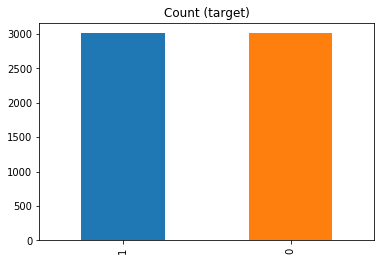

In [102]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under['TARGET'].value_counts())

df_test_under['TARGET'].value_counts().plot(kind='bar', title='Count (target)');

In [103]:
y_tr_under=df_test_under['TARGET']
df_test_under.drop(columns='TARGET', inplace=True)

In [104]:
X_undersamp_train, X_undersamp_test, y_undersamp_train, y_undersamp_test = \
    train_test_split(df_test_under, y_tr_under, test_size=0.2, random_state=1)

In [105]:
forestcl.fit(X_undersamp_train[['ID', 'var38', 'var15']], y_undersamp_train)
y_pred=forestcl.predict(X_undersamp_test[['ID', 'var38', 'var15']])
y_pr_tr=forestcl.predict(X_undersamp_train[['ID', 'var38', 'var15']])

In [106]:
print(forestcl.score(X_undersamp_train[['ID', 'var38', 'var15']], y_undersamp_train))
print(confusion_matrix(y_undersamp_train, y_pr_tr))
print(forestcl.score(X_undersamp_test[['ID', 'var38', 'var15']], y_undersamp_test))
print(confusion_matrix(y_undersamp_test, y_pred))

1.0
[[2399    0]
 [   0 2413]]
0.6237541528239202
[[361 248]
 [205 390]]


In [107]:
 print(roc_auc_score(y_undersamp_train, y_pr_tr), roc_auc_score(y_undersamp_test, y_pred)) 

1.0 0.6241186129624263


In [ ]:
#undersampling лучше oversampling для данной задачи

### 8. Сделать кросс-валидацию тренировочных данных с использованием подхода K-fold (n_folds=10)


In [108]:
from sklearn.model_selection import cross_val_score
knn_clf.fit(X_undersamp_train[['ID', 'var38', 'var15']], y_undersamp_train) 
scores = cross_val_score(knn_clf, X_undersamp_train[['ID', 'var38', 'var15']], y_undersamp_train, cv=10)
print(scores) 
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.62863071 0.63278008 0.63900415 0.65904366 0.60706861 0.66112266
 0.66735967 0.63201663 0.64449064 0.625     ]
KNN Accuracy: 0.64 (+/- 0.04)


In [110]:
forestcl.fit(X_undersamp_train[['ID', 'var38', 'var15']], y_undersamp_train)
scores = cross_val_score(forestcl, X_undersamp_train[['ID', 'var38', 'var15']], y_undersamp_train, cv=10)
scores 

array([0.65145228, 0.61618257, 0.64522822, 0.65488565, 0.64449064,
       0.66320166, 0.63409563, 0.64241164, 0.6049896 , 0.62708333])

In [111]:
print("Forest Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Forest Accuracy: 0.64 (+/- 0.03)


In [ ]:
#без некоторых кусков данных классификатор "лес" сильно проваливается 

### 9. Решить задачу бинарной классификации и предсказать удовлетворение клиентов банка (переменная TARGET)


In [114]:
forestcl.fit(X_undersamp_train[['ID', 'var38', 'var15']], y_undersamp_train)
y_pred=forestcl.predict(X_undersamp_test[['ID', 'var38', 'var15']])
y_pr_tr=forestcl.predict(X_undersamp_train[['ID', 'var38', 'var15']])

In [116]:
print(forestcl.score(X_undersamp_train[['ID', 'var38', 'var15']], y_undersamp_train))
print(confusion_matrix(y_undersamp_train, y_pr_tr))
print(forestcl.score(X_undersamp_test[['ID', 'var38', 'var15']], y_undersamp_test))
print(confusion_matrix(y_undersamp_test, y_pred))

1.0
[[2399    0]
 [   0 2413]]
0.6287375415282392
[[363 246]
 [201 394]]


In [ ]:
#исходный классификатор переобучился. 
#Нужно использовать метрики F1-Score, Precision, Recall для улучшения предсказаний удовлетворенных клиентов
#TARGET: 1 for unsatisfied customers and 0 for satisfied customers
#В соревновании использовался AUC

In [117]:
forestcl

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=40, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [118]:
grid_params = {'max_depth': range(2,40), 
                 'max_features': range(1,3),
                #'n_estimators': range(3,100)
                 #'min_weight_fraction_leaf': (0.0, 0.25, 0.5), 
                 #'min_samples_leaf': range(1,20)
              }

In [ ]:
from sklearn.metrics import roc_auc_score

In [121]:
for i in range(10,40):
    for j in range(1,4):
        forestcl.set_params(max_depth=i, max_features=j)
        forestcl.fit(X_undersamp_train[['ID', 'var38', 'var15']], y_undersamp_train)
        y_pred=forestcl.predict(X_undersamp_test[['ID', 'var38', 'var15']])
        y_pr_tr=forestcl.predict(X_undersamp_train[['ID', 'var38', 'var15']])
        print(i, j, roc_auc_score(y_undersamp_train, y_pr_tr), roc_auc_score(y_undersamp_test, y_pred)) 

10 1 0.7747977253265665 0.6890756302521007
10 2 0.7914398992396852 0.6881193856853085
10 3 0.7956010473351326 0.6789722785665991
11 1 0.7958046305728644 0.6848159953636628
11 2 0.8138924441338056 0.6781512605042016
11 3 0.812846715555435 0.6772916062976916
12 1 0.81721507459162 0.6782478508644837
12 2 0.8301020576504197 0.6764512701632377
12 3 0.8363534536682729 0.6773109243697478
13 1 0.8361353596185177 0.6831932773109243
13 2 0.8563303503825586 0.6805756785472811
13 3 0.850086209770717 0.6714092533565151
14 1 0.8607083832934257 0.6781705785762582
14 2 0.8763120840341854 0.6763546798029556
14 3 0.8713124183011052 0.6731285617695354
15 1 0.8769337168563984 0.6740268521201583
15 2 0.8921278326530239 0.6730899256254226
15 3 0.8883786879703814 0.6789143243504298
16 1 0.9069220373801973 0.6764512701632377
16 2 0.9040005272261702 0.6722109533468561
16 3 0.9110868131786504 0.6705109630058919
17 1 0.9248316616244474 0.6713512991403457
17 2 0.9417016034620034 0.6712547087800638
17 3 0.94148471

In [136]:
#максимум на тесте при max_depth=11, max_features=1
#добавив еще 13 фичей (с feature_importances_ >1% для Random Forest) значительно увеличивается точность на тесте
predictors=['var15',
'saldo_var42',
'saldo_var30',
'saldo_medio_var5_hace2',
'saldo_medio_var5_ult3',
'var38',
'saldo_medio_var5_hace3',
'saldo_medio_var5_ult1',
'saldo_var5',
'ID',
'num_var22_ult3',
'num_var45_ult3',
'num_var45_hace2',
'num_var45_hace3',
'num_var45_ult1',
'num_med_var45_ult3',
'num_var22_hace2',
'num_var22_hace3']
forestcl.set_params(max_depth=11, max_features=1)
forestcl.fit(X_undersamp_train[predictors], y_undersamp_train)
y_pred=forestcl.predict(X_undersamp_test[predictors])
y_pr_tr=forestcl.predict(X_undersamp_train[predictors])
print(roc_auc_score(y_undersamp_train, y_pr_tr), roc_auc_score(y_undersamp_test, y_pred))

0.8372653027309522 0.7556843427025983


In [ ]:
#пробуем доделать feature selection выбрасывая по одной переменные

In [153]:
for k in range(1,len(predictors)):
    for i in range(7,20):
        #print(predictors[0:k])
        forestcl.set_params(max_depth=i, max_features=1, random_state=0)
        forestcl.fit(X_undersamp_train[predictors[0:k]], y_undersamp_train)
        y_pred=forestcl.predict(X_undersamp_test[predictors[0:k]])
        y_pr_tr=forestcl.predict(X_undersamp_train[predictors[0:k]])
        print(k, i, roc_auc_score(y_undersamp_train, y_pr_tr), roc_auc_score(y_undersamp_test, y_pred)) 

1 7 0.6878461757186782 0.6952284362020671
1 8 0.6882690622405004 0.6943494639235005
1 9 0.6882642253031594 0.6935284458611032
1 10 0.6882642253031594 0.6935284458611032
1 11 0.6882618068344889 0.6935284458611032
1 12 0.6882618068344889 0.6935284458611032
1 13 0.6882618068344889 0.6935284458611032
1 14 0.6882618068344889 0.6935284458611032
1 15 0.6882763176465122 0.6918477735921955
1 16 0.6882763176465122 0.6918477735921955
1 17 0.6882763176465122 0.6918477735921955
1 18 0.6882763176465122 0.6918477735921955
1 19 0.6882763176465122 0.6918477735921955
2 7 0.7479239605810337 0.7341446923597026
2 8 0.7531151172084931 0.7366463826910075
2 9 0.7684837946188036 0.730860620110113
2 10 0.7784625691012643 0.7374674007534049
2 11 0.7911217842356265 0.7367043369071766
2 12 0.8054616623482604 0.7334009465855308
2 13 0.8154392275963859 0.7375446730416305
2 14 0.8218833237429535 0.7309185743262823
2 15 0.8283298383581915 0.7333236742973052
2 16 0.8330968992294933 0.7300589201197721
2 17 0.83600752627

15 16 0.9097838631823905 0.7536945812807883
15 17 0.91954091591209 0.7547087800637495
15 18 0.9299183922296674 0.7446633825944171
15 19 0.9380117112617894 0.7530087897227857
16 7 0.7611915069599209 0.7317202743166232
16 8 0.7755132465575257 0.7367429730512894
16 9 0.7935938047124553 0.744190089829035
16 10 0.8191678152953288 0.7514826620303294
16 11 0.8437057711745137 0.7546701439196368
16 12 0.8605527375596995 0.7529315174345601
16 13 0.8763624400068615 0.7612382884188159
16 14 0.8890313290159061 0.7570559258186034
16 15 0.8994075960991482 0.7563701342606008
16 16 0.9145521332880273 0.756331498116488
16 17 0.9166339165700863 0.7562735439003188
16 18 0.9297015074142476 0.7546894619916933
16 19 0.937805709555387 0.75642808847677
17 7 0.7589073496744654 0.7342412827199846
17 8 0.7732448093184289 0.7374867188254612
17 9 0.7904735482580375 0.7459480343861682
17 10 0.8216749035678805 0.7548246884960881
17 11 0.8376893984871097 0.7531440162271805
17 12 0.8595021720439879 0.75056505360765
17 

In [154]:
forestcl.set_params(max_depth=16, max_features=1, random_state=0)
forestcl.fit(X_undersamp_train[predictors[0:13]], y_undersamp_train)
y_pred=forestcl.predict(X_undersamp_test[predictors[0:13]])
y_pr_tr=forestcl.predict(X_undersamp_train[predictors[0:13]])
print(roc_auc_score(y_undersamp_train, y_pr_tr), roc_auc_score(y_undersamp_test, y_pred))
#max_depth=16, predictors[0:13]

0.9174446218180079 0.7579735342412828


### 10. Рассчитать Feature Importances для переменных модели

In [156]:
#forestcl.feature_importances_
for i in sorted(zip(forestcl.feature_importances_, predictors[0:13]), key=lambda x: -abs(x[0])):
    print(i)

(0.20841760643577556, 'var15')
(0.11215813419514642, 'var38')
(0.09448889613444528, 'ID')
(0.08181986213470722, 'saldo_var30')
(0.06703127837292508, 'saldo_medio_var5_hace2')
(0.06550948012703729, 'saldo_medio_var5_hace3')
(0.06438746128826539, 'saldo_var42')
(0.06363496156071902, 'saldo_medio_var5_ult3')
(0.0628230184407912, 'saldo_var5')
(0.05624885961613038, 'saldo_medio_var5_ult1')
(0.04746206248354627, 'num_var45_ult3')
(0.042677989457630766, 'num_var22_ult3')
(0.03334038975288003, 'num_var45_hace2')


### 11. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall

In [158]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
print('accuracy=',forestcl.score(X_undersamp_test[predictors[0:13]], y_undersamp_test))
print('f1=', f1_score(y_undersamp_test, y_pred, average='macro'))
print('precision_score=', precision_score(y_undersamp_test, y_pred, average='macro'))
print('recall_score=', recall_score(y_undersamp_test, y_pred, average='macro'))

accuracy= 0.7583056478405316
f1= 0.7579675474633374
precision_score= 0.7589705230496453
recall_score= 0.7579735342412828


In [159]:

roc_auc_score(y_undersamp_test, y_pred)

0.7579735342412828

### 12. Построить Confusion Matrix для ваших результатов

In [160]:
print(confusion_matrix(y_undersamp_test, y_pred))

[[479 130]
 [161 434]]


### 13. Загрузить ipython notebook с результатами работы на github репозиторий

In [ ]:
#конец решения

In [ ]:
#дальше черновик. Пожалуйста, не проверяйте.

In [ ]:
#разделяем данные на тест и трейн сохраняя в тесте и трейне одинаковые пропорции классов

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)


for train_ind, test_ind in sss.split(scaled_data_train[['ID', 'var38', 'var15']], y_train):
    print(len(i))
X_train=X_undersamp_train[['ID', 'var38', 'var15']].iloc[train_ind,:]
X_test=X_undersamp_train[['ID', 'var38', 'var15']].iloc[test_ind,:]
y_tr= y_train.iloc[train_ind]
y_te= y_train.iloc[test_ind]

#X_train, X_test, y_train, y_test = 

print(X_train.shape, X_test.shape, len(y_tr), len(y_te), np.mean(y_tr), np.mean(y_te))

In [ ]:
'saldo_medio_var5_ult3', 'num_var45_ult3', 'saldo_medio_var5_hace3', 'num_var45_hace3', 'saldo_medio_var5_hace2', 
'saldo_var30', 'saldo_var42', 'num_var45_hace2', 'num_var22_ult3', 'saldo_medio_var5_ult1'
, 'saldo_var5', 'num_med_var45_ult3'
, 'num_var45_ult1', 'num_var22_hace3'
, 'num_var22_hace2'